# 1. General information 

In [151]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [152]:
df= pd.read_excel("Coffee Shop Sales.xlsx")

In [153]:
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [154]:
df.shape

(149116, 11)

In [155]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [157]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [158]:
#Check for missing values 
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [159]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

# Univariate analysis

In [160]:
df["store_location"].value_counts()
#There are 3 unique locations, Hell's Kitchen and Astoria is sligtly more popular then Lower Manhattan

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

<Axes: ylabel='product_category'>

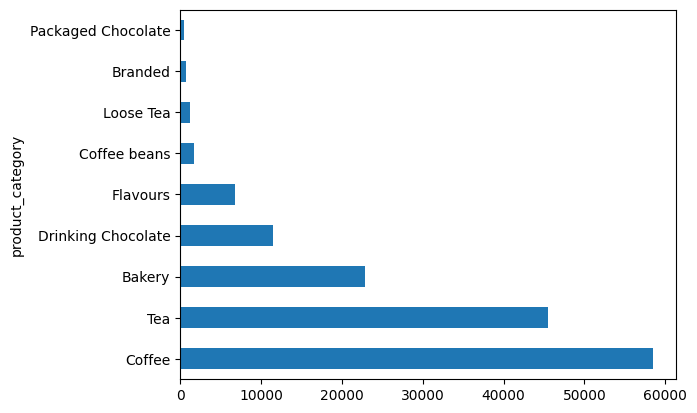

In [161]:
df["product_category"].value_counts().plot(kind="barh")


In [162]:
df["product_category"].value_counts()
#Coffee and Tea are the most popular position, followed by Bakery and Drinking chocolate.

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

<Axes: ylabel='proportion'>

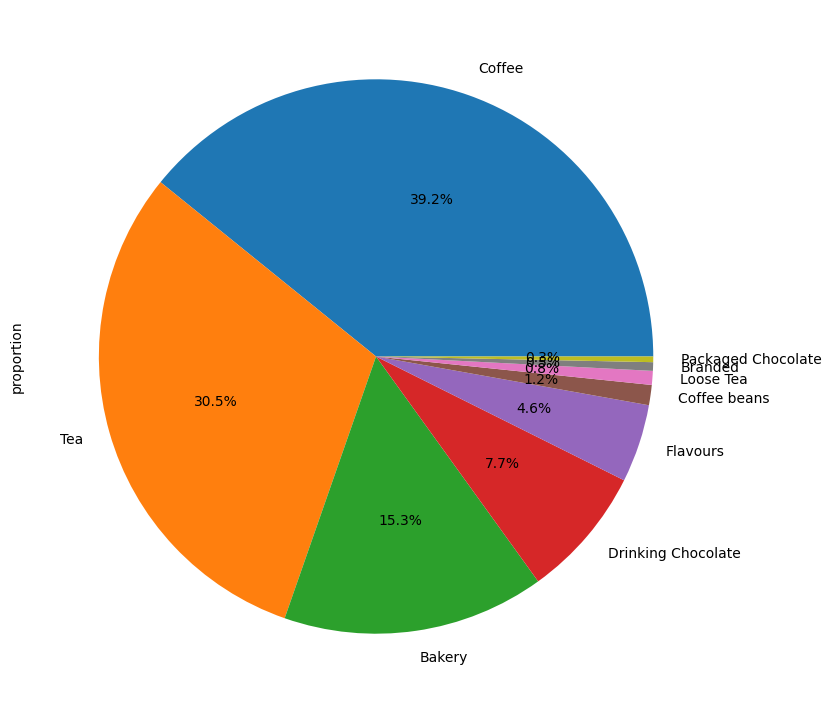

In [163]:
df["product_category"].value_counts(normalize="percentile").plot.pie(figsize=(9, 9), autopct='%1.1f%%')

In [164]:
df.groupby(["product_category"])["product_type"].value_counts()
#There is information about all product_type types of each product categories

product_category    product_type         
Bakery              Scone                    10173
                    Pastry                    6912
                    Biscotti                  5711
Branded             Housewares                 526
                    Clothing                   221
Coffee              Gourmet brewed coffee    16912
                    Barista Espresso         16403
                    Organic brewed coffee     8489
                    Drip coffee               8477
                    Premium brewed coffee     8135
Coffee beans        Organic Beans              415
                    Gourmet Beans              366
                    Premium Beans              336
                    Espresso Beans             319
                    House blend Beans          183
                    Green beans                134
Drinking Chocolate  Hot chocolate            11468
Flavours            Regular syrup             4979
                    Sugar free syrup    

In [165]:

df[df["product_category"] == "Bakery"]["product_detail"].value_counts()
#All products of each type of Bakery category, in this project I will make ml model for predicting 
#consumption of each bakery product separately. 

product_detail
Chocolate Croissant        3076
Ginger Scone               2324
Cranberry Scone            2077
Hazelnut Biscotti          2009
Jumbo Savory Scone         2008
Scottish Cream Scone       1952
Croissant                  1933
Almond Croissant           1903
Chocolate Chip Biscotti    1891
Oatmeal Scone              1812
Ginger Biscotti            1811
Name: count, dtype: int64

<Axes: xlabel='product_detail'>

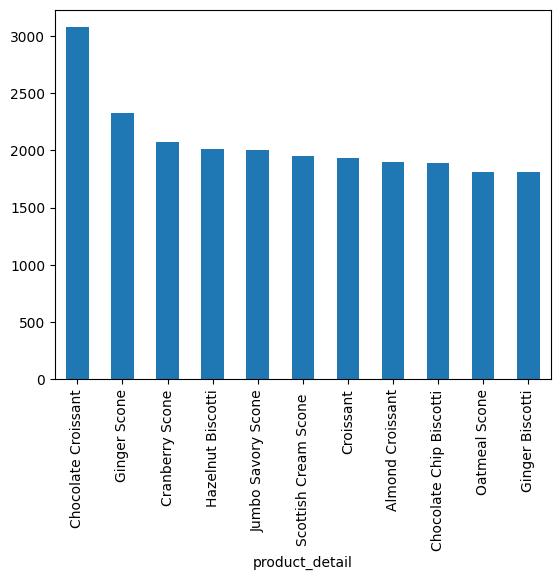

In [166]:
df[df["product_category"] == "Bakery"]["product_detail"].value_counts().plot(kind="bar")

In [167]:
#Now i will find amount of money per each transaction_id
#Eventhough I'm not sure if it's a part of Bivariate or Univariate analysis
#because i collect data from 2 columns, I will leave this part here and create
#revenue column as i would need it in the future 
df['revenue'] = df["transaction_qty"] * df["unit_price"]
df["revenue"]

0         6.00
1         6.20
2         9.00
3         2.00
4         6.20
          ... 
149111    5.00
149112    6.00
149113    3.00
149114    3.75
149115    1.60
Name: revenue, Length: 149116, dtype: float64

# Multivariate analysis 

In [168]:
#Before doing Multivariate analysis, I would like to separate time of transactions by months, weeks, days,
#and time of the day (before 12:00 - Morning, 12:00 - 18:00 , evening 18:00 - closing time)

In [169]:
df["month"] = df["transaction_date"].dt.month_name


In [170]:
df['day'] = df["transaction_date"].dt.day_of_year


In [171]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,<bound method PandasDelegate._add_delegate_acc...,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,<bound method PandasDelegate._add_delegate_acc...,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,<bound method PandasDelegate._add_delegate_acc...,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,<bound method PandasDelegate._add_delegate_acc...,181
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,<bound method PandasDelegate._add_delegate_acc...,181
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,<bound method PandasDelegate._add_delegate_acc...,181
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,<bound method PandasDelegate._add_delegate_acc...,181


In [172]:
df["day_of_week"] = df["transaction_date"].dt.day_name()


In [173]:
df["transaction_time"] = pd.to_datetime(df['transaction_time'].astype(str))
df["transaction_time"].dtype


C:\Users\vaker\AppData\Local\Temp\ipykernel_14828\263968289.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["transaction_time"] = pd.to_datetime(df['transaction_time'].astype(str))


dtype('<M8[ns]')

In [174]:
df["time"] = df["transaction_time"].dt.hour

In [175]:
conditions = [
    (df['time'] < 12),
    (df['time'] >= 12) & (df['time'] < 18),
    (df['time'] >= 18)
]
part_of_day = ['morning', 'lunch', 'evening']

df['part_of_day'] = np.select(conditions, part_of_day, default='unknown')

df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month,day,day_of_week,time,part_of_day
0,1,2023-01-01,2025-07-16 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
1,2,2023-01-01,2025-07-16 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
2,3,2023-01-01,2025-07-16 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
3,4,2023-01-01,2025-07-16 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
4,5,2023-01-01,2025-07-16 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,2025-07-16 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149112,149453,2023-06-30,2025-07-16 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149113,149454,2023-06-30,2025-07-16 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149114,149455,2023-06-30,2025-07-16 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening


In [176]:
df.drop(["transaction_time", "transaction_date", "transaction_id"], axis = 1, inplace=True)


In [177]:
df

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,month,day,day_of_week,time,part_of_day
0,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
1,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
2,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
3,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
4,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,<bound method PandasDelegate._add_delegate_acc...,1,Sunday,7,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149112,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149113,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening
149114,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,<bound method PandasDelegate._add_delegate_acc...,181,Friday,20,evening


In [178]:
df["month"].value_counts()


month
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x0000019A6D77BB30>>    149116
Name: count, dtype: int64

In [179]:
df.groupby(["month"])["revenue"].sum()
#There can be seen a trend: the more we close to summer time, the more is revenue


month
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x0000019A6D77BB30>>    698812.33
Name: revenue, dtype: float64

In [180]:
df.groupby(["day_of_week"])["revenue"].sum()
#Revenue +- doesn't vary on different days of week 

day_of_week
Friday       101373.00
Monday       101677.28
Saturday      96894.48
Sunday        98330.31
Thursday     100767.78
Tuesday       99455.94
Wednesday    100313.54
Name: revenue, dtype: float64

In [181]:
df.groupby(["part_of_day"])["revenue"].sum()
#Here is logical trend, people most likely to visit cafe in the morning and lunch time 

part_of_day
evening     65668.52
lunch      244855.14
morning    388288.67
Name: revenue, dtype: float64

In [182]:
df.groupby(["store_location"])["revenue"].sum()
#revenue by stores is the same in the end 

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: revenue, dtype: float64

### Important note: there are a lot of production to compare, in this project i will focus on my idea to create a system for analyzing each product and predicting it's sales depend on the parameters. For this task I will use Bakery as an example. This system could be applied towards other products later on. Below is the Multivariate analysis for Bakery and a process of cleaning and formatting the data.

In [183]:
Bakery = df[df["product_category"] == "Bakery"]

In [184]:
Bakery["revenue"].sum()


np.float64(82315.64000000001)

In [185]:
Bakery["revenue"].mean()

np.float64(3.6109685909808746)

In [186]:
Bakery["product_type"].value_counts()
#3 categories of Bakery: Scones, Pastry and Biscotti


product_type
Scone       10173
Pastry       6912
Biscotti     5711
Name: count, dtype: int64

In [187]:
Bakery[Bakery["product_type"] == "Scone"]["product_detail"].value_counts()
Bakery[Bakery["product_type"] == "Biscotti"]["product_detail"].value_counts()
Bakery[Bakery["product_type"] == "Pastry"]["product_detail"].value_counts()
"""
           Scone
Ginger Scone             2324
Cranberry Scone          2077
Jumbo Savory Scone       2008
Scottish Cream Scone     1952
Oatmeal Scone            1812

           Pastry
Chocolate Croissant    3076
Croissant              1933
Almond Croissant       1903

           Biscotti
Hazelnut Biscotti          2009
Chocolate Chip Biscotti    1891
Ginger Biscotti            1811
"""


'\n           Scone\nGinger Scone             2324\nCranberry Scone          2077\nJumbo Savory Scone       2008\nScottish Cream Scone     1952\nOatmeal Scone            1812\n\n           Pastry\nChocolate Croissant    3076\nCroissant              1933\nAlmond Croissant       1903\n\n           Biscotti\nHazelnut Biscotti          2009\nChocolate Chip Biscotti    1891\nGinger Biscotti            1811\n'

<Axes: ylabel='product_detail'>

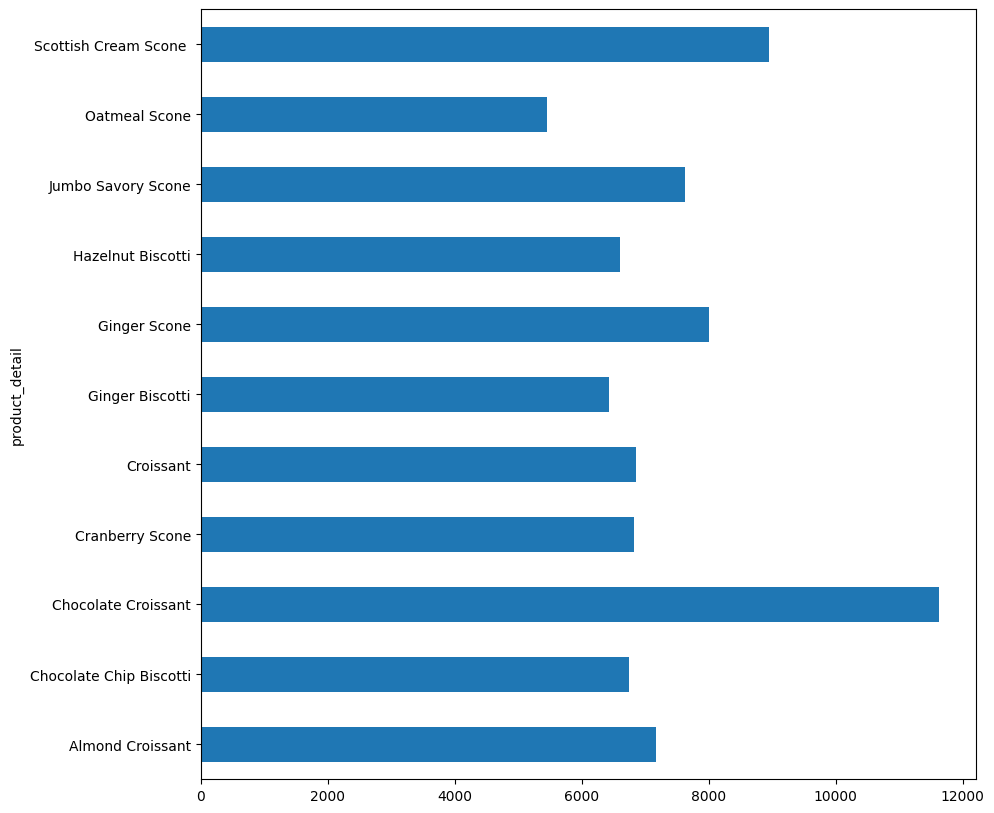

In [188]:
Bakery.groupby(["product_detail"])["revenue"].sum().plot(kind = "barh", figsize=(10, 10))

In [189]:
Bakery.groupby("day_of_week")["revenue"].sum()


day_of_week
Friday       11902.50
Monday       12244.17
Saturday     11325.10
Sunday       11537.45
Thursday     11900.17
Tuesday      11542.43
Wednesday    11863.82
Name: revenue, dtype: float64

In [190]:
Bakery.groupby("month")["revenue"].sum()

month
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x0000019A6D77BB30>>    82315.64
Name: revenue, dtype: float64

In [191]:
Bakery.groupby("part_of_day")["revenue"].sum()

part_of_day
evening     6964.63
lunch      27188.31
morning    48162.70
Name: revenue, dtype: float64

In [192]:
Bakery.groupby("day_of_week")["revenue"].sum()

day_of_week
Friday       11902.50
Monday       12244.17
Saturday     11325.10
Sunday       11537.45
Thursday     11900.17
Tuesday      11542.43
Wednesday    11863.82
Name: revenue, dtype: float64

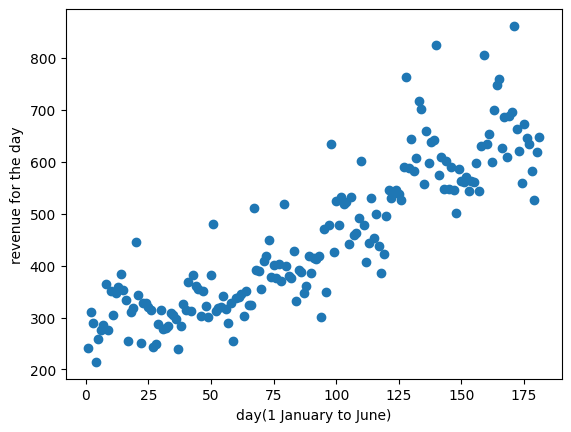

In [193]:
plt.scatter(x = Bakery["day"].unique(), y = Bakery.groupby("day")["revenue"].sum())
plt.xlabel("day(1 January to June)")
plt.ylabel("revenue for the day")
plt.show()